In [1]:
import os
import pandas as pd
import json
import folium
import numpy as np

In [2]:
folium.__version__

'0.5.0'

In [3]:
eu_unemployment = os.path.join('./une_rt_a/', 'une_rt_a_1_Data.csv')

eu_unemployment_data = pd.read_csv(eu_unemployment)

eu_unemployment_data = eu_unemployment_data.loc[(eu_unemployment_data['TIME']==2015)].drop(['UNIT','SEX'],axis=1)

eu_unemployment_data['Value'] = eu_unemployment_data['Value'].apply(pd.to_numeric)

eu_unemployment_data = eu_unemployment_data.replace(['EL','UK'],['GR','GB'])

In [4]:
geo_europe = open('geojson/europe.geojson')
geo_europe = json.loads(geo_europe.read())

m = folium.Map(location=[56,20], zoom_start=3.5)

folium.GeoJson(geo_europe, name='geo_europe').add_to(m)

m

In [5]:
for country in geo_europe['features']:
    print(country['id'],country['properties']['NAME'])

BG Bulgaria
CY Cyprus
DK Denmark
IE Ireland
EE Estonia
AT Austria
CZ Czech Republic
FI Finland
FR France
DE Germany
GR Greece
HR Croatia
HU Hungary
IS Iceland
IT Italy
LV Latvia
LT Lithuania
SK Slovakia
MT Malta
BE Belgium
LU Luxembourg
NL Netherlands
NO Norway
PL Poland
PT Portugal
RO Romania
SI Slovenia
ES Spain
SE Sweden
CH Switzerland
TR Turkey
GB United Kingdom
VA Holy See (Vatican City)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11182a5f8>]], dtype=object)

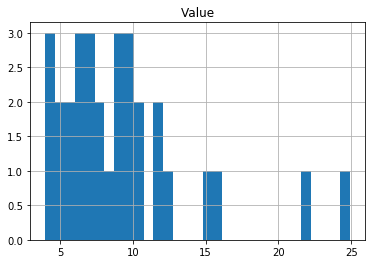

In [6]:
%matplotlib inline
eu_unemployment_data.hist(column='Value',bins = 31)

In [7]:
eu_unemployment_data

,TIME,GEO,GEO_LABEL,AGE,Value
465,2015,BE,Belgium,Total,8.5
466,2015,BG,Bulgaria,Total,9.2
467,2015,CZ,Czech Republic,Total,5.1
468,2015,DK,Denmark,Total,6.2
469,2015,DE,Germany (until 1990 former territory of the FRG),Total,4.6
470,2015,EE,Estonia,Total,6.2
471,2015,IE,Ireland,Total,9.4
472,2015,GR,Greece,Total,24.9
473,2015,ES,Spain,Total,22.1
474,2015,FR,France,Total,10.4


In [8]:
#threshold_scale = np.linspace(eu_unemployment_data['Value'].min(),eu_unemployment_data['Value'].max(), 6, dtype=int).tolist()
threshold_scale = [4,8,10,15,20]
print(threshold_scale)

m.choropleth(
    geo_data= geo_europe,
    name= 'choropleth',
    data= eu_unemployment_data,
    columns= ['GEO', 'Value'],
    key_on= 'feature.id',
    threshold_scale= threshold_scale,
    fill_color='YlGn',
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
    
)


folium.LayerControl().add_to(m)

m

[4, 8, 10, 15, 20]


We see that we can download the data from the EU website in such a way that we extract only what we really need. 

In [19]:
eu_unemployment_data.loc[eu_unemployment_data['GEO']=='BG','Value'].iloc[0]

9.1999999999999993

In [26]:
def style_function():
    return {
        'fillOpacity': 0.5
    }

for country in geo_europe['features']:
    folium.GeoJson(
        country,
        style_function= style_function()      
    ).add_child(folium.Popup("put text")).add_to(m)

m

TypeError: 'method' object is not subscriptable